Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 5: Bayesove mreže i naivni Bayesov klasifikator

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.1</i> <br/>
<i>Zadnji put ažurirano: 27. prosinca 2016.</i> 

Objavljeno: **27. prosinca 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **2. siječnja 2017.**

### Upute

Peta laboratorijska vježba sastoji se od tri zadatka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### 1. Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [pgmpy](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate.

#### (a)

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (sl. varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Sve varijable modelirane su Bernoullijevom razdiobom.

![This](bayes-net-sprinkler.jpg)

Koristeći paket [pgmpy](https://github.com/pgmpy/pgmpy), konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim provedite **egzaktno** zaključivanje za sljedeće upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu.

**NB:** Bacite oko na službenu demonstraciju danu na https://github.com/pgmpy/pgmpy/blob/dev/examples/Monte%20Hall%20Problem.ipynb.

In [2]:
from pgmpy.models import BayesianModel, NaiveBayes
from pgmpy.factors import TabularCPD
from pgmpy.inference import VariableElimination

In [3]:
sprinkler_model = BayesianModel([('Cloudy', 'Sprinkler'), 
                              ('Cloudy', 'Rain'),
                              ('Rain', 'Wet Grass'),
                              ('Sprinkler', 'Wet Grass')])

In [4]:
cloudy = TabularCPD(variable='Cloudy', variable_card=2, values=[[0.5], [0.5]])

sprinkler = TabularCPD(
    variable='Sprinkler', variable_card=2, values=[[0.5, 0.9], [0.5, 0.1]], evidence=['Cloudy'], evidence_card=[2]
)
rain = TabularCPD(
    variable='Rain', variable_card=2, values=[[0.8, 0.2], [0.2, 0.8]], evidence=['Cloudy'], evidence_card=[2]
)

wet_grass = TabularCPD(
    variable='Wet Grass', variable_card=2, evidence=['Sprinkler', 'Rain'], evidence_card=[2, 2], 
    values=[[1.0, 0.1, 0.1, 0.01],[0.0, 0.9, 0.9, 0.99]]
)

In [5]:
sprinkler_model.add_cpds(cloudy, sprinkler, rain, wet_grass)
sprinkler_model.check_model()

True

In [6]:
infer = VariableElimination(sprinkler_model)

posteriog_grass = infer.query(['Wet Grass'])
print posteriog_grass['Wet Grass']

posteriog_sprinkler = infer.query(['Sprinkler'], evidence={'Wet Grass': 1})
print posteriog_sprinkler['Sprinkler']

+-------------+------------------+
| Wet Grass   |   phi(Wet Grass) |
|-------------+------------------|
| Wet Grass_0 |           0.3529 |
| Wet Grass_1 |           0.6471 |
+-------------+------------------+
+-------------+------------------+
| Sprinkler   |   phi(Sprinkler) |
|-------------+------------------|
| Sprinkler_0 |           0.5702 |
| Sprinkler_1 |           0.4298 |
+-------------+------------------+


In [7]:
posteriog_rain = infer.query(['Rain'], evidence={'Wet Grass': 1})
print posteriog_rain['Rain']

posteriog_cloudy = infer.query(['Cloudy'], evidence={'Sprinkler': 1, 'Rain': 1})
print posteriog_cloudy['Cloudy']

posteriog_cloudy = infer.query(['Cloudy'])
print posteriog_cloudy['Cloudy']

+--------+-------------+
| Rain   |   phi(Rain) |
|--------+-------------|
| Rain_0 |      0.2921 |
| Rain_1 |      0.7079 |
+--------+-------------+
+----------+---------------+
| Cloudy   |   phi(Cloudy) |
|----------+---------------|
| Cloudy_0 |        0.5556 |
| Cloudy_1 |        0.4444 |
+----------+---------------+
+----------+---------------+
| Cloudy   |   phi(Cloudy) |
|----------+---------------|
| Cloudy_0 |        0.5000 |
| Cloudy_1 |        0.5000 |
+----------+---------------+


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže? <br>
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi? <br>
**Q:** Ako je trava mokra ($w=1$), što je prema mreži vjerojatnije -- da je pala kiša ($r=1$) ili da je netko upalio prskalicu ($s=1$)? <br>
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

#### (b)

**Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. S obzirom na to da i prva i druga varijabla mogu samostalno objasniti treću, ono što se događa jest to da, ako znamo da se ostvarila treća varijabla, naše vjerovanje o prvoj varijabli mijenja ovisno o tome je li se ili nije dogodila druga varijabla (i obrnuto).

Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [8]:
sprinkler_model.local_independencies('Wet Grass')

print 'P(Sprinkler|Wet Grass) =/= P(Sprinkler|Wet Grass, Rain)     --> EXPLAINING AWAY'
posteriog_sprinkler = infer.query(['Sprinkler'], evidence={'Wet Grass': 1})
print posteriog_sprinkler['Sprinkler']

posteriog_sprinkler = infer.query(['Sprinkler'], evidence={'Wet Grass': 1, 'Rain': 1})
print posteriog_sprinkler['Sprinkler']

P(Sprinkler|Wet Grass) =/= P(Sprinkler|Wet Grass, Rain)     --> EXPLAINING AWAY
+-------------+------------------+
| Sprinkler   |   phi(Sprinkler) |
|-------------+------------------|
| Sprinkler_0 |           0.5702 |
| Sprinkler_1 |           0.4298 |
+-------------+------------------+
+-------------+------------------+
| Sprinkler   |   phi(Sprinkler) |
|-------------+------------------|
| Sprinkler_0 |           0.8055 |
| Sprinkler_1 |           0.1945 |
+-------------+------------------+


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

#### (c) 

Koristeći [`BayesianModel.is_active_trail`](http://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.is_active_trail) provjerite jesu li varijable oblačnosti ($C$) i mokre trave ($W$) uvjetno nezavisne.

In [9]:
sprinkler_model.is_active_trail('Cloudy', 'Wet Grass')

True

Što mora vrijediti kako te dvije varijable ne bi bile uvjetno nezavisne? Provjerite korištenjem iste funkcije.

In [10]:
sprinkler_model.is_active_trail('Cloudy', 'Wet Grass', observed=['Rain', 'Sprinkler'])

False

**Q:** Kako možemo na temelju grafa saznati koje dvije varijable su, uz neka opažanja, uvjetno nezavisne? <br>
**Q:** Zašto bismo uopće htjeli znati koje su varijable u mreži uvjetno nezavisne?

### 2. Naivan Bayesov klasifikator

Iako je naivni Bayes specijalna podvrsta Bayesovih mreža i mogao bi se modelirati paketom [pgmpy](https://github.com/pgmpy/pgmpy), ipak ćemo se vratiti na paket `sklearn` (radi jednostavnosti). Za demonstraciju rada Bayesovog klasifikatora s diskretnim značajkama treba nam skup primjera s diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

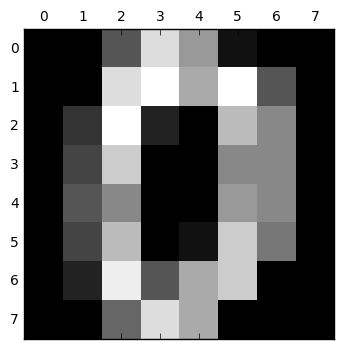

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

plt.gray() 
plt.matshow(digits.images[0])
plt.show();

#### (a)

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Proučite funkciju [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) te načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

In [12]:
from sklearn.preprocessing import binarize
from sklearn import cross_validation

In [13]:
print 'Normal', digits.images[0]
print '\nBin', binarize(digits.images[0])
print '\nBin_ravel', binarize(digits.images[0].ravel())[0]

binary_images = [binarize(image).ravel() for image in digits.images]

Normal [[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]

Bin [[ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.]]

Bin_ravel [ 0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.
  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]


/home/weenkus/anaconda3/envs/ml27/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_images, digits.target, test_size=0.3)

#### (b)

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za učenje). Izračunajte točnost modela na skupu za učenje i na skupu za ispitivanje koristeći funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [15]:
import sklearn.naive_bayes as nbay
from sklearn.metrics import accuracy_score

In [16]:
model = nbay.BernoulliNB()
model.fit(X_train, y_train)

print 'Acc_train:', accuracy_score(y_train, model.predict(X_train))
print 'Acc_test:', accuracy_score(y_test, model.predict(X_test))

Acc_train: 0.870326173429
Acc_test: 0.831481481481


**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

#### (c)

Trenirajte model bez zaglađivanja (`alpha=0`) te izračunajte točnost takvog modela na oba skupa podataka.

In [17]:
model = nbay.BernoulliNB(alpha=0)
model.fit(X_train, y_train)

print 'Acc_train:', accuracy_score(y_train, model.predict(X_train))
print 'Acc_test:', accuracy_score(y_test, model.predict(X_test))

Acc_train: 0.102625298329
Acc_test: 0.0907407407407


In [18]:
model = nbay.BernoulliNB(alpha=0.001)
model.fit(X_train, y_train)

print 'Acc_train:', accuracy_score(y_train, model.predict(X_train))
print 'Acc_test:', accuracy_score(y_test, model.predict(X_test))

Acc_train: 0.87907716786
Acc_test: 0.833333333333


**Q:** U čemu je problem? Opišite svojim riječima.

### 3. Bayesov klasifikator za kontinuirane značajke

#### (a)

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30. Koristite funkciju [`datasets.load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

In [19]:
from sklearn.datasets import load_iris
from sklearn import cross_validation

In [20]:
iris = load_iris()
print 'Classes:', iris.target_names

X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.3)

Classes: ['setosa' 'versicolor' 'virginica']


#### (b)

Proučite razred [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koji implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [21]:
model = nbay.GaussianNB()
model.fit(X_train, y_train)

print 'Acc_train:', accuracy_score(y_train, model.predict(X_train))
print 'Acc_test:', accuracy_score(y_test, model.predict(X_test))

Acc_train: 0.952380952381
Acc_test: 0.977777777778


#### (c)

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode.


In [22]:
from scipy.stats import multivariate_normal

In [23]:
class MultivariantNaiveBayesGB(object):

    def __init__(self):
        self.mean = []
        self.cov = []
        self.probs = []

    def fit(self, X, y):
        targets = set(y)
        print 'Number of classes:', len(targets)
        
        for target in targets:
            X_target = X[y == target]
            
            prob = len(X_target)/float(len(y))
            self.probs.append(prob)
            
            mean = np.mean(X_target, axis=0)
            self.mean.append(mean)
            
            cov = np.cov(X_target.T)
            self.cov.append(cov)

    def predict(self, X):
        targets_predictions = []
        for target, mean in enumerate(self.mean):
            cov = self.cov[target]
            prob = self.probs[target]
            
            pred = multivariate_normal.pdf(X, mean=mean, cov=cov) * prob
            targets_predictions.append(pred)
            
        targets_predictions = np.array(targets_predictions)
        
        predictions = []
        for i in range(targets_predictions.shape[1]):
            pred = np.argmax(targets_predictions[:, i])
            predictions.append(pred)
                
        return np.array(predictions)

#### (d)

Izračunajte točnost modela na ispitnome dijelu skupa *Iris* i usporedite je s točnošću naivnog Bayesovog klasifikatora iz podzadatka (b).

In [24]:
model = MultivariantNaiveBayesGB()
model.fit(X_train, y_train)

print 'Acc_train:', accuracy_score(y_train, model.predict(X_train))
print 'Acc_test:', accuracy_score(y_test, model.predict(X_test))

Number of classes: 3
Acc_train: 1.0
Acc_test: 0.955555555556
